# Numerische Integration

## Arbeitsblatt zur Einarbeitung

Dieses Arbeitsblatt muss vor der Lektion am Donnerstag morgen durchgearbeitet werden. Hier lernst du die numerische Integration. Ziel ist es, das Integral einer analytisch gegebenen Funktion numerisch zu berechnen. Dies werden wir rudimentär implemntieren. Den Fall, dass nur Daten anstatt einer analytischen Funktion gegeben sind und weitere Details besprechen wir im Präsenzunterricht.


## Grundsätzliches Vorgehen


Das **bestimmte Integral** ist aus dem Modul **Analysis & Algebra** (1. Semester) bekannt. Eine kurze Wiederholung: Das Integral kehr die Ableitung um, d.h. die Integration dient der Rekonstruktion einer Funktion aus ihrer Ableitung. Das bestimmte Integral $\int_a^b f(x)\,dx$ kann als die gerichtete Fläche zwischen dem Graphen von $f(x)$ und der $x$-Achse im Bereich $x\in[a,b]$ interpretiert werden. Der **Hauptsatz der Differential- und Integralrechnung** lässt uns ein bestimmtes Integral berechnen, wenn wir eine Stammfunktion $F(x)$ des Integranden kennen, also

$$ F'(x) = f(x) \qquad\Rightarrow\qquad \int_a^b f(x)\, dx = F(b) - F(a) $$

Die numerische Integration kommt dann zur Anwedung, wenn

- der Integrand zawr als Funktion gegeben ist, dessen Stammfunktion jedoch nicht analytisch bestimmt werden kann. Beispiele:
  - $ f(x) = \sin(x)\cdot x^{-1} $
  - $ f(x) = \exp\left(-x^2\right) $ (Gauss-Funktion)
- das Integral im Prinzip analytisch integrierbar ist, die analytische Auswertung jedoch unverhältnismässig viel Rechenaufwand erfordert.
- der Integrand nur punktweise gegeben ist, also als Datenreihe $(x_i, f(x_i))$.

### Trapezregel

Eine einfache aber bereits recht gute Näherung des bestimmten Integrals erhält man mit der [Trapezregel](https://de.wikipedia.org/wiki/Trapezregel). Schaue dir eines der Erklärvideos an:

- ["TRAPEZREGEL (Numerischer Integration)" - Mathe Peter](https://www.youtube.com/watch?v=BZbzdsvpc3c)
- ["Näherungsformel zum Trapezverfahren, Numerische Integration" - Daniel Jung](https://www.youtube.com/watch?v=6hqHufW0dD4)


## Arbeitsauftrag


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


### Aufgabe 1


#### a) Die Trapezregel


Überlege dir ein Grundsätzliches Vorgehen für die Implementation der Trapezregel.


- Zerlege das Intervall $[a,b]$ in $n$ gleich breite Intervalle.
- Berechne Funktionswerte an den Intervallgrenzen und verbinde diese mit Geraden, so dass $n-1$ Trapeze entstehen.
- Berechne die Flächen der Trapeze.
- Die Summe aller Flächen ergibt eine Näherung des Integrals.
- Je größer $n$ desto genauer das Ergebnis.

$$ T_n = \frac{h}{2} \left( f(a) + 2\sum_{i=1}^{n-1} f(a + ih) + f(b) \right) \,,\qquad\text{wobei}\quad h = \frac{b-a}{n} $$


#### b) Trapezregel implementieren


Schreibe eine Funktion `trapezregel(func, a, b, n)`, die als Parameter die zu integrierende Funktion `func`, die Integrationsgrenzen `a` und `b` und die Anzahl Trapeze `n` nimmt.


In [2]:
def trapezregel(func, a, b, n):
    h = (b - a) / n
    x = a + np.arange(1, n) * h
    y = func(x)
    sum_trapez = np.sum(y)
    return 0.5 * h * (func(a) + 2 * sum_trapez + func(b))


#### c) Implementation testen


Berechne das folgende Integral mit deiner Funktion `trapezregel` und `n=4` Trapezen

$$ \int_0^1 e^{x^2} dx $$

Genau dieses Integral wird im [Video vom MathePeter](https://youtu.be/BZbzdsvpc3c) berechnet. Er findet das Resultat $\approx 1.4907$. Du auch?


In [3]:
def f(x):
    return np.exp(x**2)


a = 0
b = 1
n = 4

trapezregel(f, a, b, n)


1.4906788616988553

#### d) Darstellung

1. Stelle $f(x)=\exp(x^2)$ im Bereich $x \in [-1.5, 1.5]$ grafisch dar.
2. Benutze die Funktion [`plt.fill_between`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html), um die Fläche zwischen $y=f(x)$ und der $x$-Achse im integrierten Bereich $[0,1]$ einzufärben.
3. Füge die 4 linear verbundenen Punkte hinzu, die bei der Berechnng der Trapezregel mit `n=4` benutzt werden. (Dazu kannst du `plt.plot` und `plt.stem` kombinieren.)


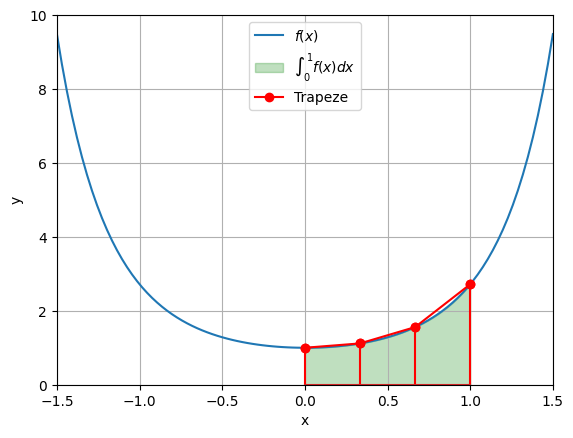

In [4]:
x = np.linspace(-1.5, 1.5, 100)
y = f(x)

x_ab = np.linspace(a, b)
y_ab = f(x_ab)

x_trapez = np.linspace(a, b, n)
y_trapez = f(x_trapez)

plt.plot(x, y, label="$f(x)$")
plt.fill_between(x_ab, y_ab, alpha=0.25, color="green", label="$\int_0^1 f(x)dx$")
plt.stem(x_trapez, y_trapez, "ro-")
plt.plot(x_trapez, y_trapez, "ro-", label="Trapeze")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-1.5, 1.5)
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.show()


### Aufgabe 2


#### a) Benutzen von SciPy


Das Modul [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html) stellt Funktionen fürs Integrieren bereit. Wir benutzen [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad) für die Integration von Funktionen.

Überprüfe die Lösung deiner selbstgeschriebenen Funktion mit verschiedenen `n`-Werten, indem du das Ergebnis mit `scipy.integrate.quad` vergleichst. Benutze auch [Wolfram|Alpha](https://www.wolframalpha.com/), um einen weiteren Vergleichswert zu berechnen.

Wolfram Alpha: [Lösung](https://www.wolframalpha.com/input/?i=integrate+e%5Ex%5E2+from+0+to+1) 1.46265


In [5]:
scipy.integrate.quad(f, a, b)


(1.4626517459071815, 1.623869645314337e-14)

In [6]:
[trapezregel(f, a, b, n) for n in [2, 4, 8, 16, 32, 64, 128, 256]]


[1.571583165458632,
 1.4906788616988553,
 1.4697122764296655,
 1.464420310149482,
 1.4630941026064281,
 1.4627623485777272,
 1.462679397418588,
 1.4626586588377732]

#### b) Fehleranalyse


Berechne den absoluten Fehler in Abhängigkeit von $n$, also die Differenz zwischen der selbst implementierten Trapezregel und `scipy.integrate.quad`.

Der absolute Fehler soll positiv sein, wenn das Resultat von `trapezregel` grösser ist als das von SciPy. Stelle den Fehler grafisch dar und schaue dir an, was passiert, wenn du $n$ änderst.

- Plote den Fehler in Abhängigkeit von $n$. Wähle $n \in \{1, 2, 3, \ldots , 100\} $
- Benutze [plt.semilogy](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html), um die y-Achse logarithmisch zu skalieren.

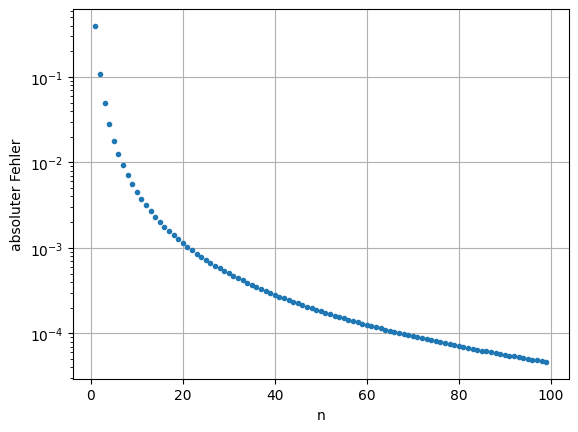

In [7]:
n_range = np.arange(1, 100)
reference = scipy.integrate.quad(f, a, b)[0]
error = np.array([trapezregel(f, a, b, n) - reference for n in n_range])

plt.semilogy(n_range, error, ".")
plt.grid()
plt.xlabel("n")
plt.ylabel("absoluter Fehler")
plt.show()
